$
 Q^*=\frac{Q}{v \pi R^2}=\frac{v \pi a^2}{v \pi r^2}=\frac{a^2}{r^2}=\lambda^2 
$

$\varphi=\frac{\lambda^2}{\pi} \theta+\frac{\lambda^2}{2 \pi} \sin 2 \theta \stackrel{(x, y)}{\Rightarrow} \frac{\lambda^2}{ \pi}\left(\frac{x y}{x^2+y^2}+ \tan ^{-1}\left(\frac{y}{x}\right)\right)$

$V_x =\frac{\lambda^2}{\pi} \cdot \frac{2 x^3}{\left(x^2+y^2\right)^2}$

$V_y=\frac{\lambda^2}{\pi} \frac{2 x^2 y}{\left(x^2+y^2\right)^2}$

shear stress: $\tau=\frac{\partial \nu_y}{\partial x}=\frac{\partial}{\partial x}\left[\frac{\lambda^2}{\pi} \cdot \frac{2 x^2 y}{\left(x^2+y^2\right)^2}\right]$
$
=\frac{\lambda^2}{\pi} \cdot \frac{4 xy\left(y^2-x^2\right)}{\left(x^2+y^2\right)^3}
$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
x = np.linspace(0, 1, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)

R_squared = X**2 + Y**2 + 1e-8  # Adding a small value to avoid division by zero

#Q* = lamda^2
lamda = 2/10
c = lamda**2/np.pi

#Stream function phi
phi = c * (np.arctan2(Y, X) + (X * Y / R_squared))

#Vx & Vy
Vx = c * (2 * X**3 / R_squared**2)
Vy = c * (2 * X**2 * Y / R_squared**2)

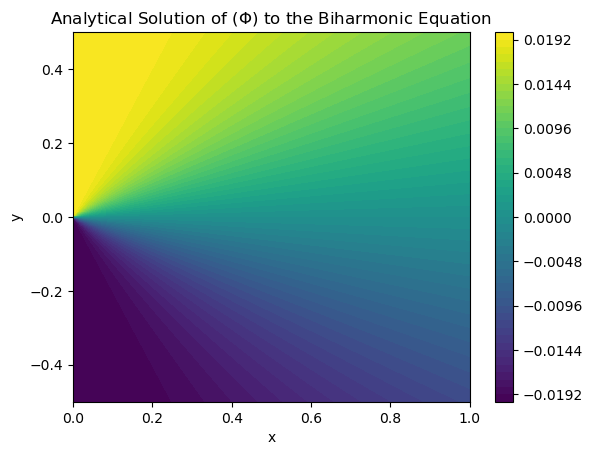

In [3]:
#Stream function phi plot
plt.contourf(X, Y, phi, levels=50, cmap='viridis')  # Increase to 50 levels
plt.colorbar()
plt.title('Analytical Solution of ($\Phi$) to the Biharmonic Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

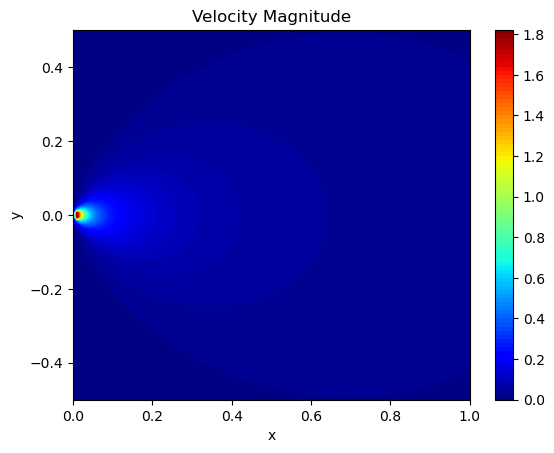

In [4]:
# Plot contours of the velocity magnitude
velocity_magnitude = np.sqrt(Vx**2 + Vy**2)

fig, ax = plt.subplots()
plt.contourf(X, Y, velocity_magnitude, cmap=cm.jet, levels=100)
plt.colorbar()
plt.title('Velocity Magnitude')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

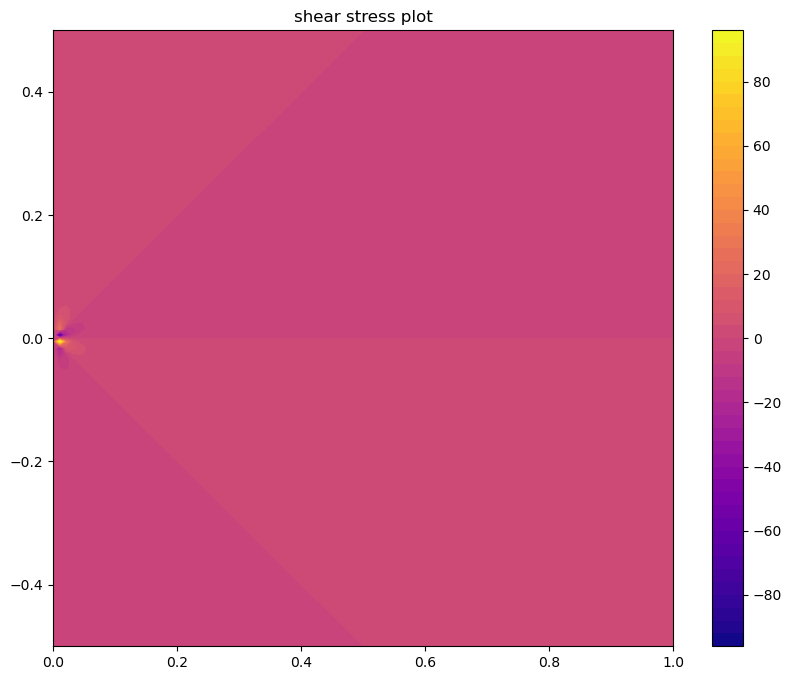

[[-0.         -0.00410881 -0.00817749 ...  0.00999947  0.00988974
   0.00977848]
 [-0.         -0.00436794 -0.00869145 ...  0.01018587  0.01006621
   0.00994543]
 [-0.         -0.00464932 -0.00924935 ...  0.01036327  0.01023371
   0.01010344]
 ...
 [ 0.          0.00464932  0.00924935 ... -0.01036327 -0.01023371
  -0.01010344]
 [ 0.          0.00436794  0.00869145 ... -0.01018587 -0.01006621
  -0.00994543]
 [ 0.          0.00410881  0.00817749 ... -0.00999947 -0.00988974
  -0.00977848]]
[[0.00000000e+00 4.19565781e-07 3.34832543e-06 ... 1.63597271e-02
  1.63295095e-02 1.62974659e-02]
 [0.00000000e+00 4.55238662e-07 3.63264137e-06 ... 1.66334961e-02
  1.65982979e-02 1.65613609e-02]
 [0.00000000e+00 4.94784342e-07 3.94777418e-06 ... 1.69083957e-02
  1.68680874e-02 1.68261344e-02]
 ...
 [0.00000000e+00 4.94784342e-07 3.94777418e-06 ... 1.69083957e-02
  1.68680874e-02 1.68261344e-02]
 [0.00000000e+00 4.55238662e-07 3.63264137e-06 ... 1.66334961e-02
  1.65982979e-02 1.65613609e-02]
 [0.0000

In [5]:
#shear stress plot 
shear_stress = c * 4 * X * Y * (Y**2 - X**2) / R_squared**3

plt.figure(figsize=(10, 8))
contour1 = plt.contourf(X, Y, shear_stress, levels=50, cmap='plasma') 
plt.colorbar(contour1)
plt.title('shear stress plot')

plt.show()

print(shear_stress)
print(Vx)
print(Vy)

In [6]:
# For the source and sink at x=1
R_squared_2 = (X-1)**2 + Y**2 + 1e-8 

# Stream function phi1
phi2 = c * (np.arctan2(Y, X) - np.arctan2(Y, X-1) + ((X * Y) / R_squared) - ((X-1) * Y / R_squared_2))

# Vx & Vy
Vx2 = c * (2 * X**3 / R_squared**2 - 2 * (X-1)**3 / R_squared_2**2)
Vy2 = c * (2 * X**2 * Y / R_squared**2 - 2 * (X-1)**2 * Y / R_squared_2**2)

velocity_magnitude2 = np.sqrt(Vx2**2 + Vy2**2)

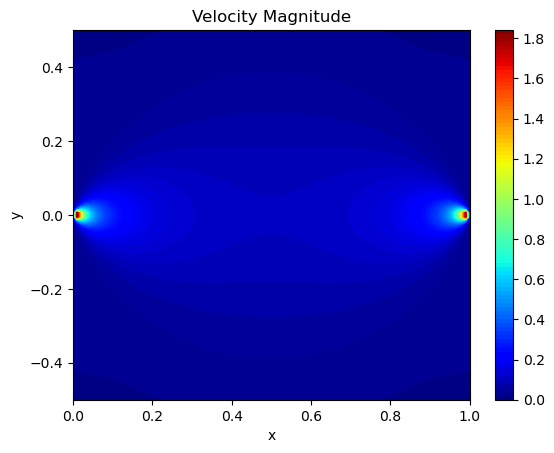

In [7]:
# Plot contours of the velocity magnitude
fig, ax = plt.subplots()
plt.contourf(X, Y, velocity_magnitude2, cmap=cm.jet, levels=100)
plt.colorbar()
plt.title('Velocity Magnitude')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

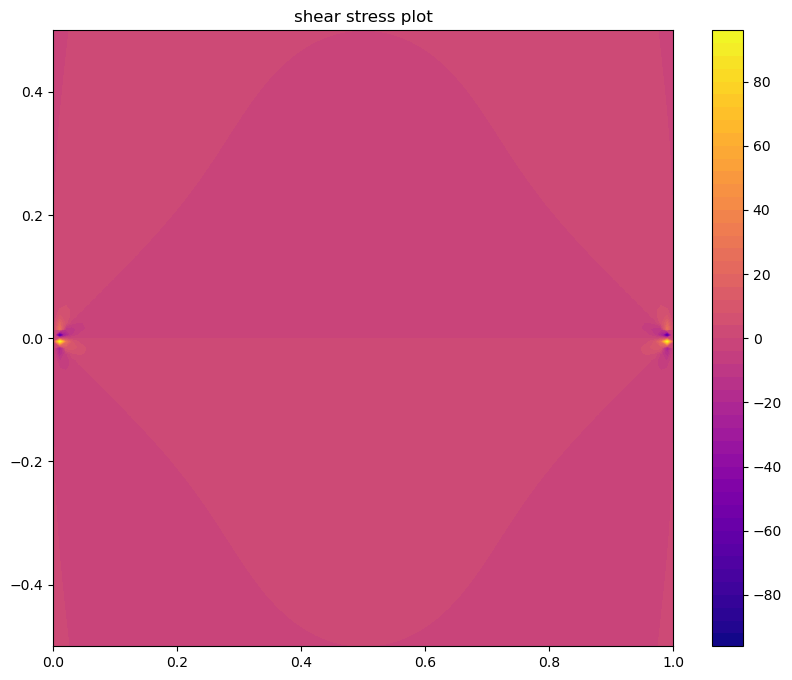

[[-0.         -0.00410881 -0.00817749 ...  0.00999947  0.00988974
   0.00977848]
 [-0.         -0.00436794 -0.00869145 ...  0.01018587  0.01006621
   0.00994543]
 [-0.         -0.00464932 -0.00924935 ...  0.01036327  0.01023371
   0.01010344]
 ...
 [ 0.          0.00464932  0.00924935 ... -0.01036327 -0.01023371
  -0.01010344]
 [ 0.          0.00436794  0.00869145 ... -0.01018587 -0.01006621
  -0.00994543]
 [ 0.          0.00410881  0.00817749 ... -0.00999947 -0.00988974
  -0.00977848]]
[[0.00000000e+00 4.19565781e-07 3.34832543e-06 ... 1.63597271e-02
  1.63295095e-02 1.62974659e-02]
 [0.00000000e+00 4.55238662e-07 3.63264137e-06 ... 1.66334961e-02
  1.65982979e-02 1.65613609e-02]
 [0.00000000e+00 4.94784342e-07 3.94777418e-06 ... 1.69083957e-02
  1.68680874e-02 1.68261344e-02]
 ...
 [0.00000000e+00 4.94784342e-07 3.94777418e-06 ... 1.69083957e-02
  1.68680874e-02 1.68261344e-02]
 [0.00000000e+00 4.55238662e-07 3.63264137e-06 ... 1.66334961e-02
  1.65982979e-02 1.65613609e-02]
 [0.0000

In [8]:
#shear stress plot 
shear_stress2 = c * 4 * X * Y * (Y**2 - X**2) / R_squared**3 - c * 4 * (X-1) * Y * (Y**2 - (X-1)**2) / R_squared_2**3

plt.figure(figsize=(10, 8))
contour1 = plt.contourf(X, Y, shear_stress2, levels=50, cmap='plasma') 
plt.colorbar(contour1)
plt.title('shear stress plot')

plt.show()

print(shear_stress)
print(Vx)
print(Vy)